# ML Starter in Grade Prediction

I was newbie and data science and still like to follow along tutorial.

This notebook is combination from two person:

1. [yashtiwari1906](https://www.kaggle.com/yashtiwari1906)
2. [Raphael Blaise](https://www.kaggle.com/koalablaize)

Thanks!!!

## 1. Analyzing the Data

### 1.1 Import module & dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings

matplotlib.rcParams['figure.figsize'] = (12,8) # Default size of plot
warnings.filterwarnings('ignore') # Ignore all warnings sign
sns.set_style('darkgrid') # Choose darkgrid theme

In [2]:
df = pd.read_csv('/kaggle/input/student-grade-prediction/student-mat.csv')

### 1.2 Explore dataset

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print("Row:", df.shape[0])
print("Column:", df.shape[1])

Row: 395
Column: 33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 1.3 Sex & Age Correlation

In [6]:
df['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

In [7]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

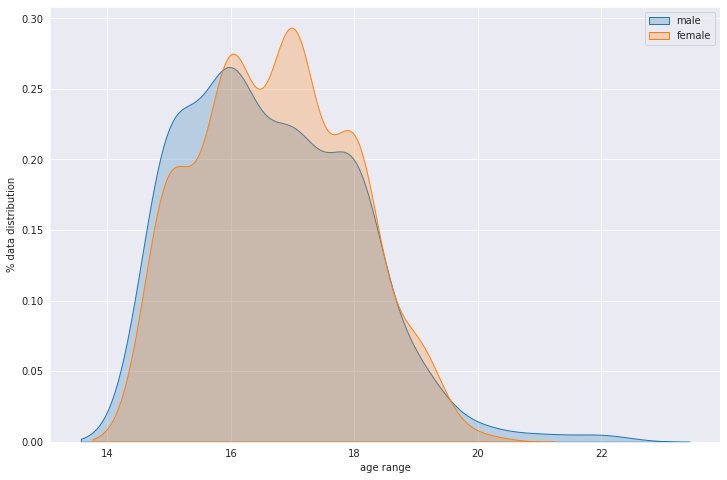

In [8]:
sns.kdeplot(df.groupby('sex').get_group('M')['age'], shade = True, label='male')
sns.kdeplot(df.groupby('sex').get_group('F')['age'], shade = True, label='female')
plt.xlabel('age range')
plt.ylabel("% data distribution")
plt.legend()
plt.show()

From the graph we can understand that student range is around 14 until 22. 

In average, female student is more than male student

### Explicit: Finding sex correlation function

Creating Function to make ploting easier

In [9]:
def create_sex_corr_plot(params):
    sns.kdeplot(df.groupby('sex').get_group('M')[params], shade = True, label='male')
    sns.kdeplot(df.groupby('sex').get_group('F')[params], shade = True, label='female')
    plt.xlabel(f'{params} range')
    plt.ylabel("% data distribution")
    plt.legend()
    plt.show()

### 1.4 Sex & Study Time Correlation

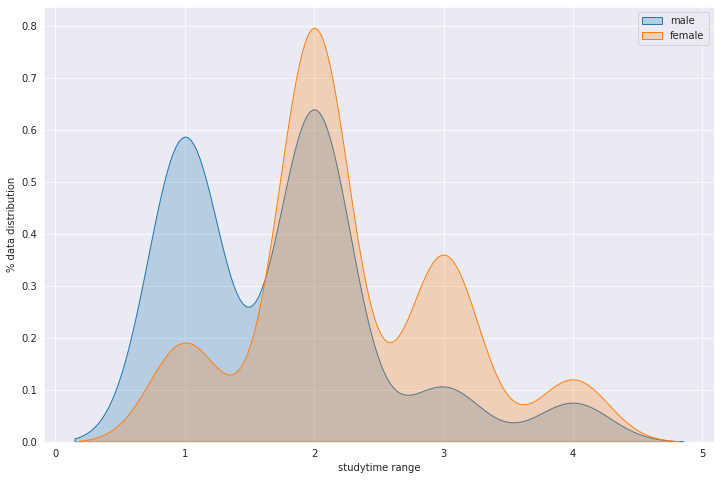

In [10]:
create_sex_corr_plot("studytime")

### 1.5 Sex & Travel Time Correlation

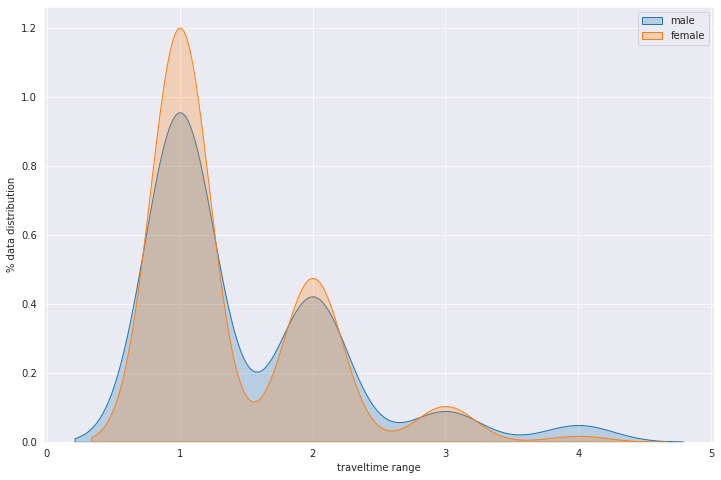

In [11]:
create_sex_corr_plot("traveltime")

### 1.6 Comparing object data

In [12]:
objects = df.dtypes=='object'
objects_col = objects[objects].index
obj_col = list(objects_col)
obj_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

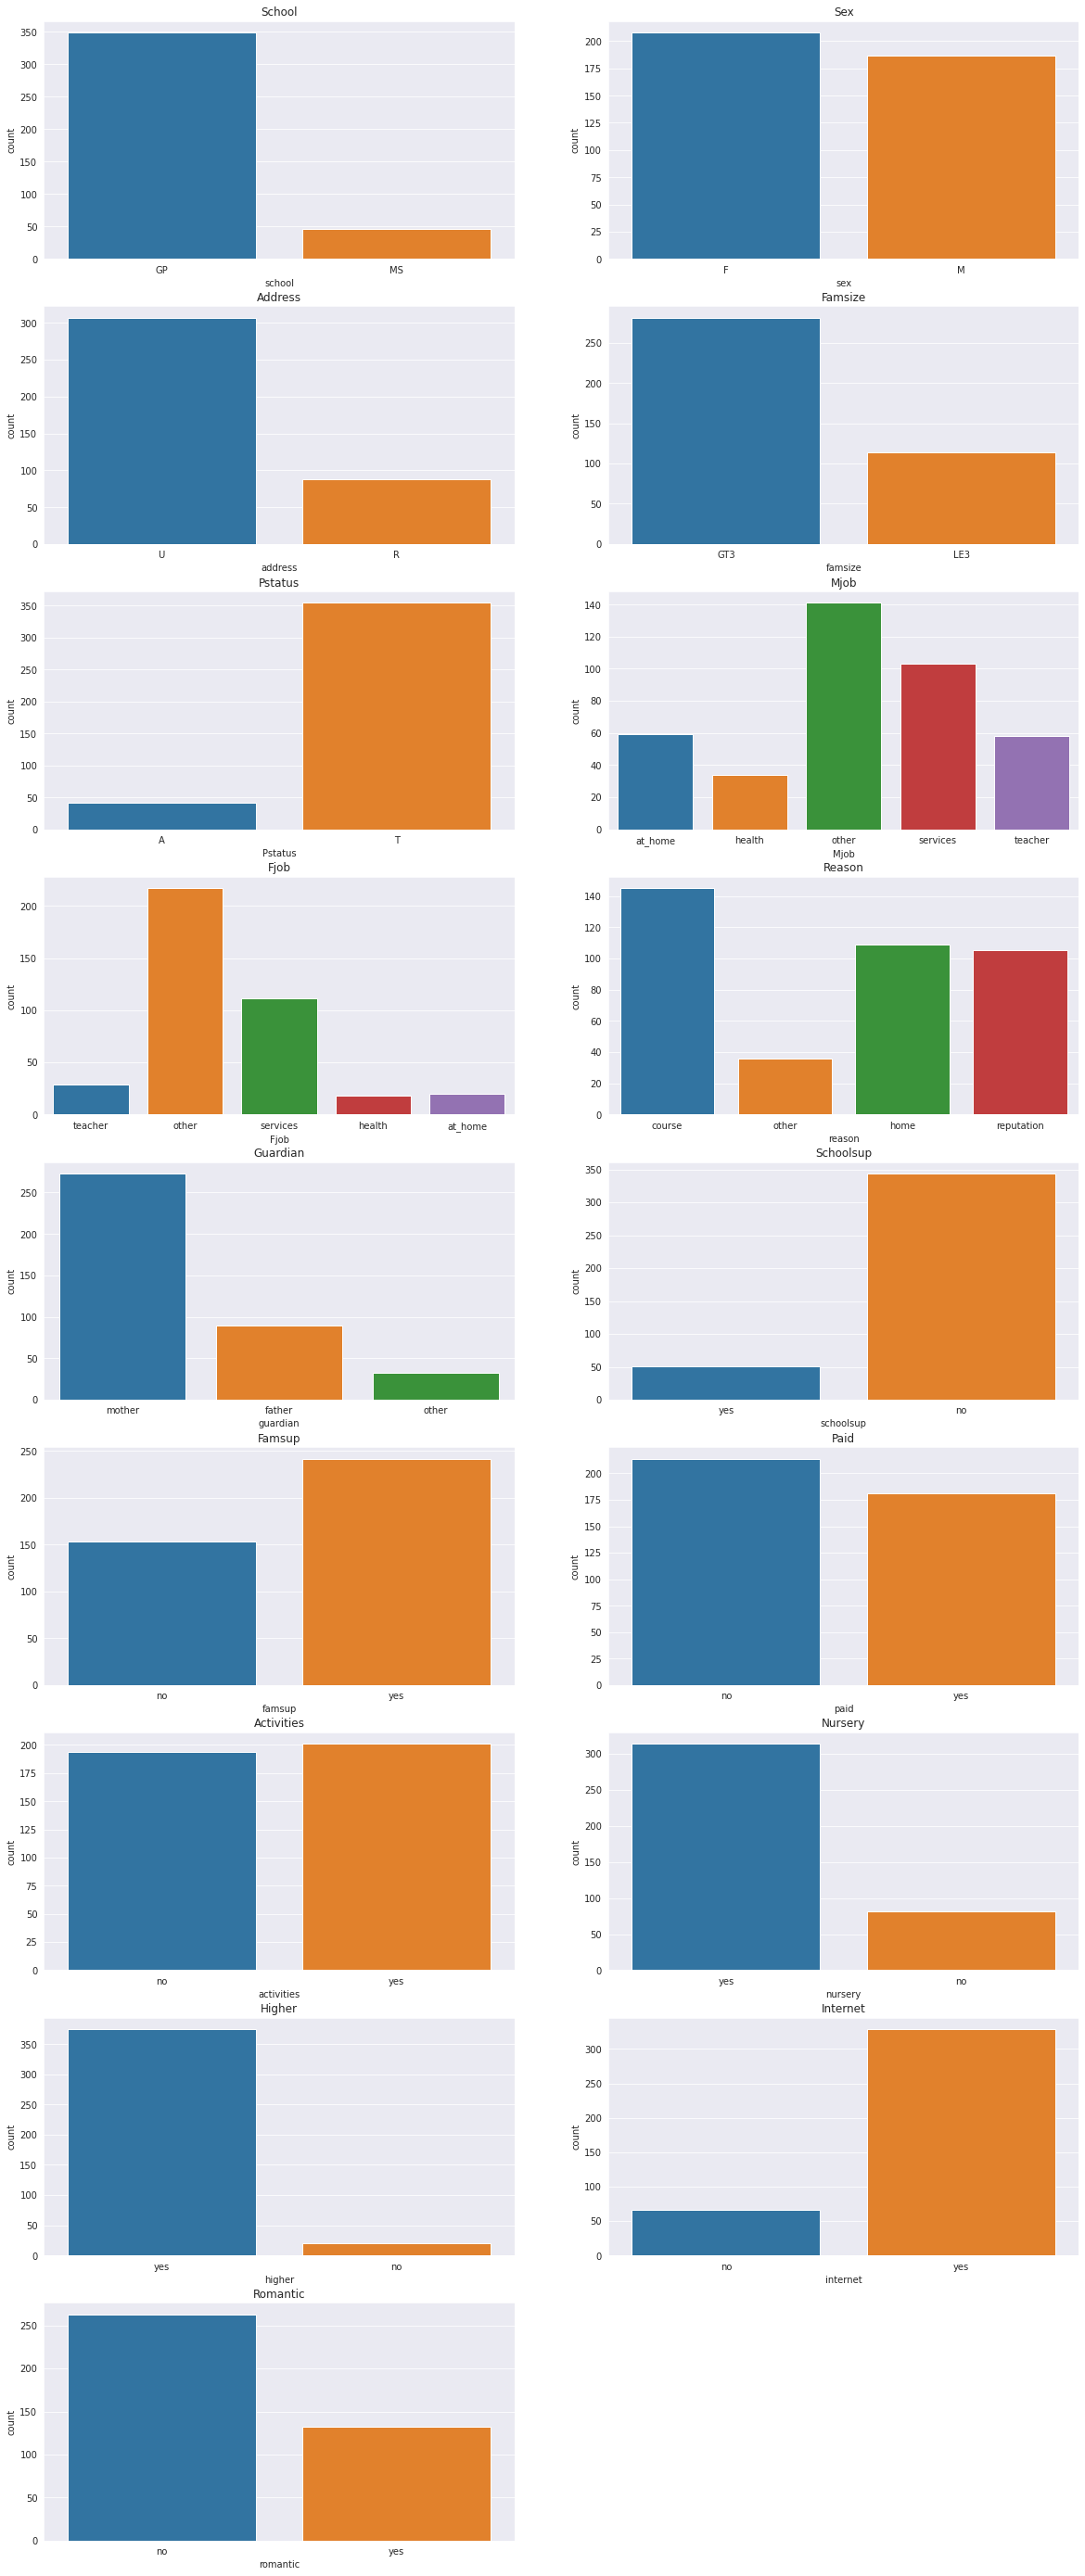

In [13]:
plt.figure(figsize=(20,50))
for idx, name in enumerate(obj_col):
    plt.subplot(9, 2, idx+1)
    sns.countplot(df[name])
    plt.title(name.title())
    
plt.show()

### 1.7 Parents & Grade Correlation

In [14]:
# Father job
df.groupby("Fjob")['G1'].median()

Fjob
at_home     11.5
health      11.0
other       10.0
services    11.0
teacher     14.0
Name: G1, dtype: float64

In [15]:
# Mother job
df.groupby("Mjob")['G1'].median()

Mjob
at_home     10
health      13
other       10
services    11
teacher     11
Name: G1, dtype: int64

### Explicit: Comparing common function

In [16]:
def common_comparison(params, grade='G1'):
    order_by = df.groupby(params)[grade].median().sort_values(ascending = False).index
    sns.boxplot(x = df[params], y = df[grade], order = order_by)
    plt.xticks(rotation=90)
    plt.title(f"{params} v/s {grade}")

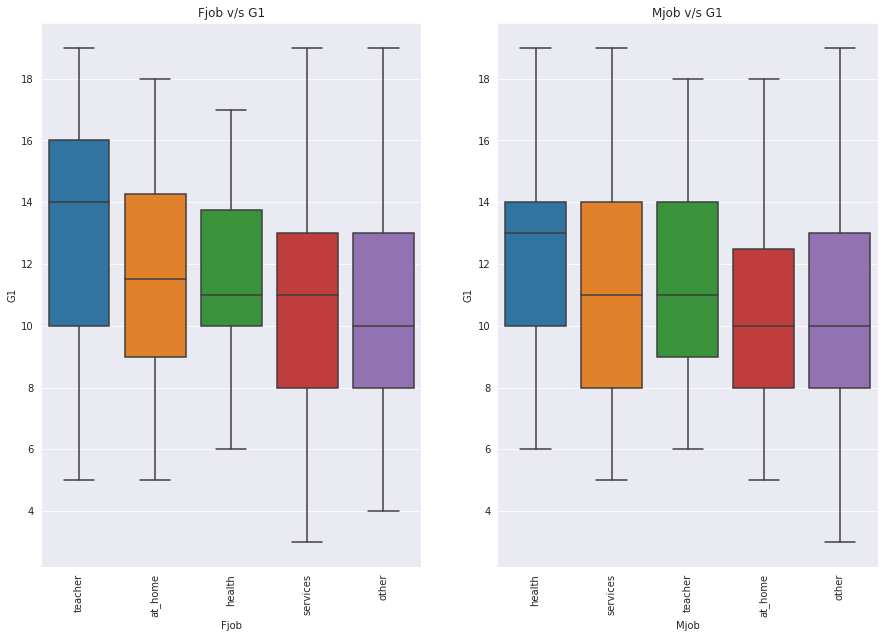

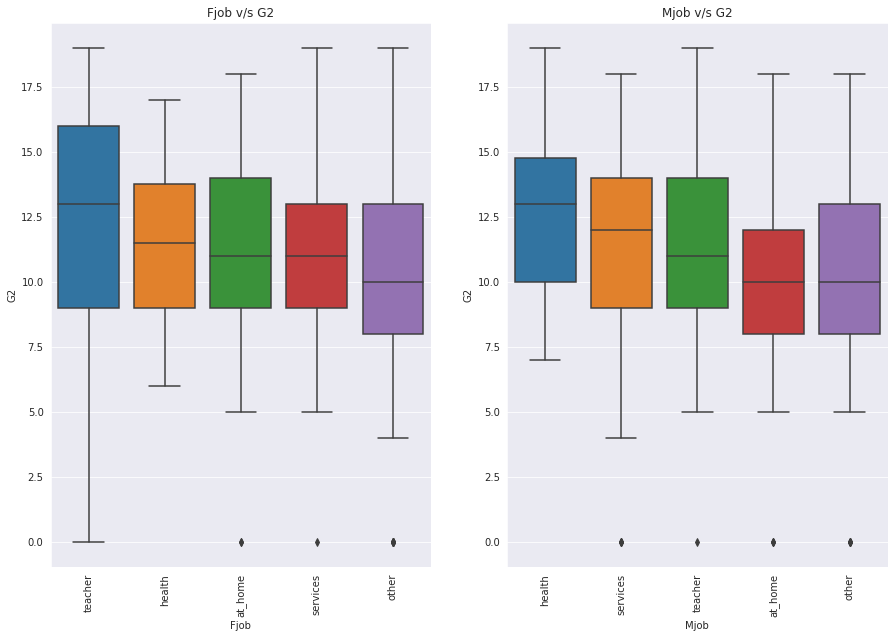

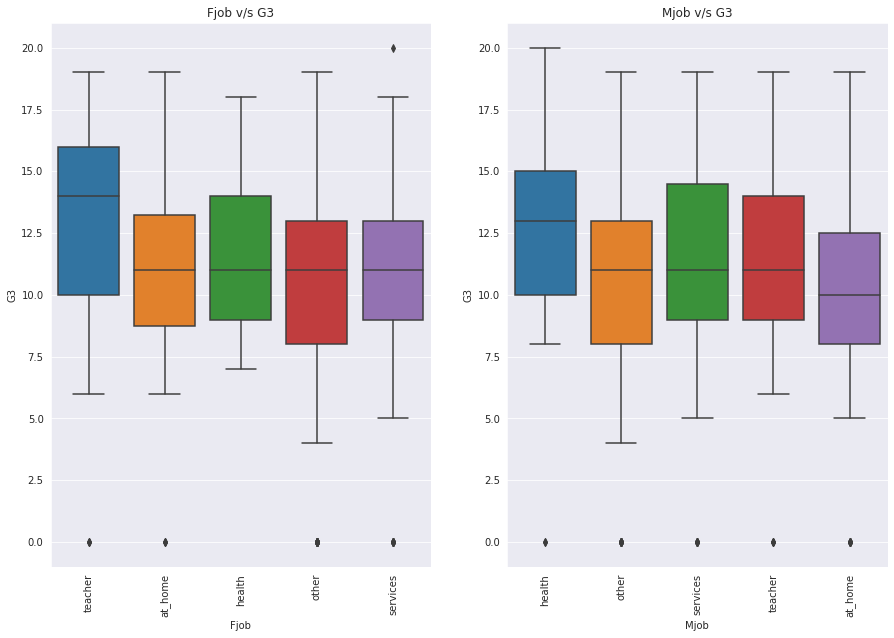

In [17]:
parents_job = ['Fjob', 'Mjob']

plt.figure(figsize=(15,10))

for idx, name in enumerate(parents_job):
    plt.subplot(1, 2, idx+1)
    common_comparison(name)

plt.show()

plt.figure(figsize=(15,10))
    
for idx, name in enumerate(parents_job):
    plt.subplot(1, 2, idx+1)
    common_comparison(name, 'G2')
    
plt.show()

plt.figure(figsize=(15,10))
    
for idx, name in enumerate(parents_job):
    plt.subplot(1, 2, idx+1)
    common_comparison(name, 'G3')
    
plt.show()

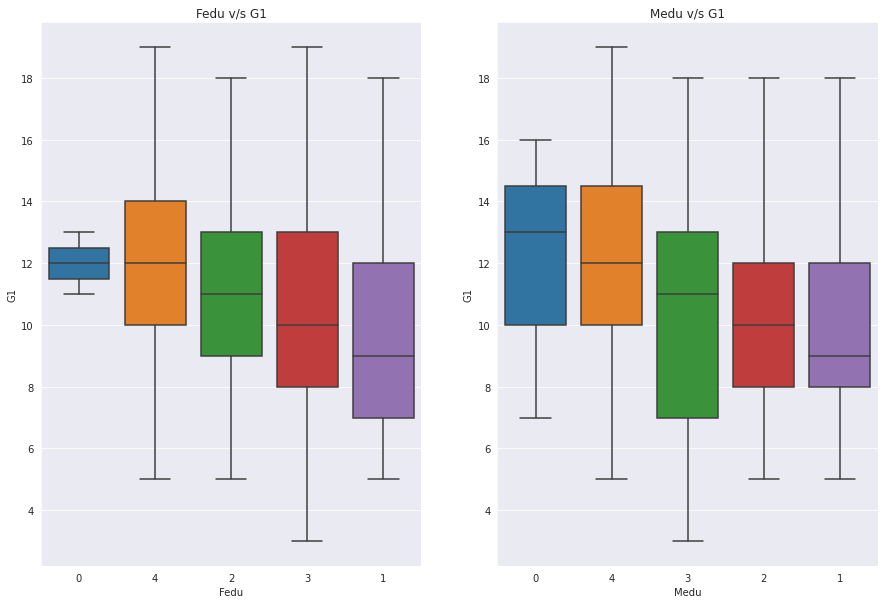

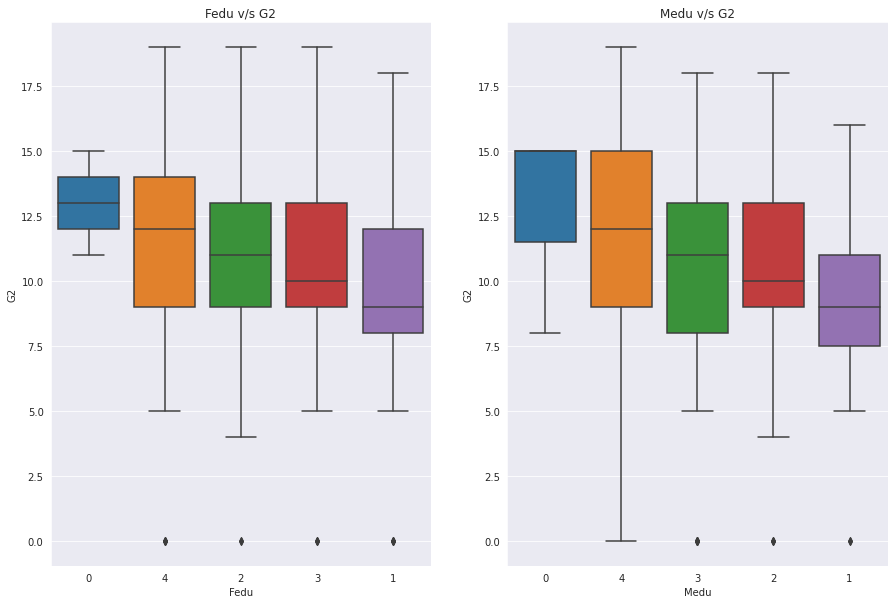

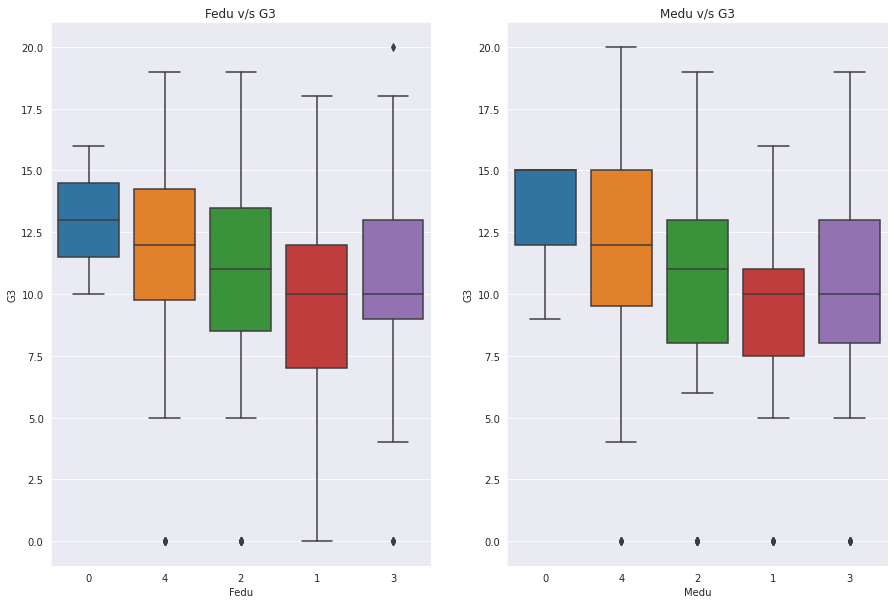

In [18]:
parents_edu = ['Fedu', 'Medu']

plt.figure(figsize=(15,10))

for idx, name in enumerate(parents_edu):
    plt.subplot(1, 2, idx+1)
    common_comparison(name)
    plt.xticks(rotation=0)

plt.show()

plt.figure(figsize=(15,10))

for idx, name in enumerate(parents_edu):
    plt.subplot(1, 2, idx+1)
    common_comparison(name, 'G2')
    plt.xticks(rotation=0)

plt.show()

plt.figure(figsize=(15,10))

for idx, name in enumerate(parents_edu):
    plt.subplot(1, 2, idx+1)
    common_comparison(name, 'G3')
    plt.xticks(rotation=0)

plt.show()

### 1.8 Medain 

In [19]:
obj_col_2 = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

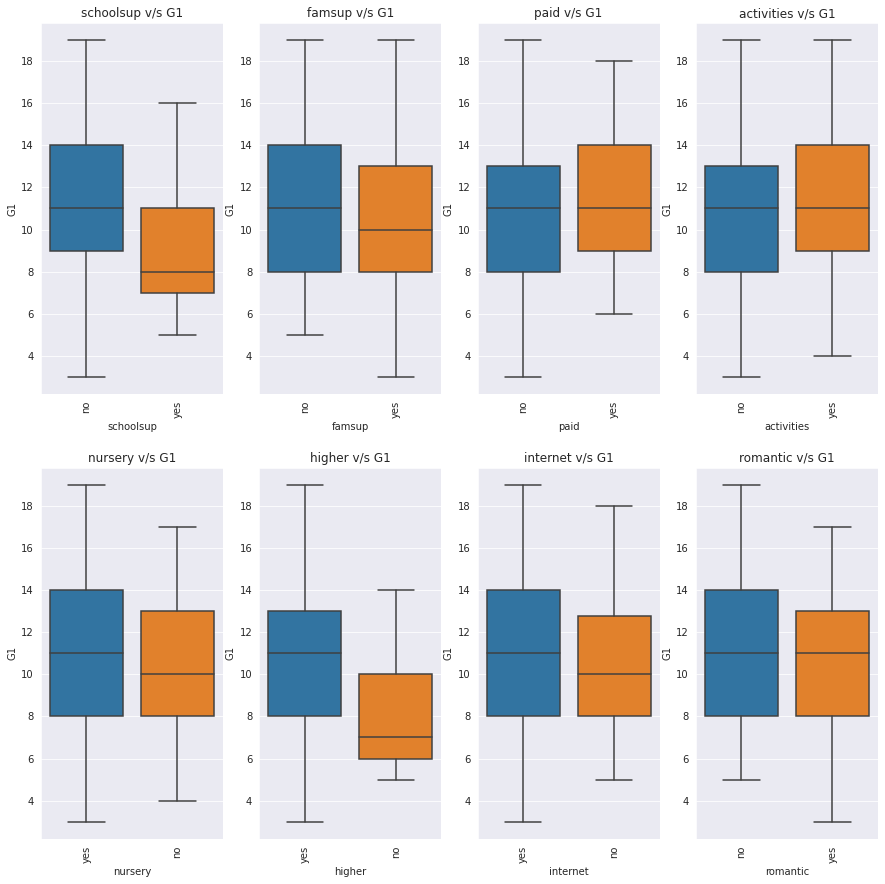

In [20]:
plt.figure(figsize=(15,15))

for idx, name in enumerate(obj_col_2):
    plt.subplot(2,4,idx+1)
    common_comparison(name)

plt.show()

## 2. Machine Learning Comparison

### 2.1 Import Important Module

In [21]:
# Data split
from sklearn.model_selection import train_test_split

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
from sklearn.linear_model import LinearRegression

# Support Vector Regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# Metrics Accuracy
from sklearn.metrics import r2_score

In [22]:
df_ml = df[['studytime', 'failures', 'Dalc', 'Walc', 
            'health', 'absences', 'traveltime', 
            'G1', 'G2', 'G3']]

### 2.2 Random Forst Regression

In [23]:
X_rf = df_ml.iloc[:, :-1].values
y_rf = df_ml.iloc[:, -1].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.3, random_state = 0)

In [25]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [26]:
y_rf_pred = rf_model.predict(X_test)

In [27]:
rf_score = (r2_score(y_test, y_rf_pred))

In [28]:
print("Random Forest Score:", rf_score)

Random Forest Score: 0.8697636385703016


### 2.3 Linear Regression

In [29]:
X_lr = df_ml.iloc[:, :-1].values
y_lr = df_ml.iloc[:, -1].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

In [31]:
lr_score = (r2_score(y_test, y_lr_pred))

In [32]:
print("Linear Regression Score:", lr_score)

Linear Regression Score: 0.7912731329449054


### 2.4 Support Vector Regression

In [33]:
X_svr = df_ml.iloc[:, :-1].values
y_svr = df_ml.iloc[:, -1].values
y_svr = y_svr.reshape(len(y_svr), 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_svr, y_svr, test_size=0.30, random_state=0)

In [35]:
# There must be two scaler, because it contains different value
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)

In [36]:
svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train, y_train.ravel()) 

SVR()

In [37]:
y_svr_pred = scaler_y.inverse_transform(svr_model.predict(scaler_x.transform(X_test)))

In [38]:
svr_score = (r2_score(y_test, y_svr_pred))

In [39]:
print("Support Vector Regression Score:", svr_score)

Support Vector Regression Score: 0.7348848831818673


### 2.5 Polynomial Regression

It will reuse the linear regression data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)

In [42]:
pr_models = PolynomialFeatures(degree=2)
X_poly = pr_models.fit_transform(X_lr)
pr_model = LinearRegression()
pr_model.fit(X_poly, y_lr)

LinearRegression()

In [43]:
y_pr_pred = pr_model.predict(pr_models.fit_transform(X_test))

In [44]:
pr_score = (r2_score(y_test, y_pr_pred))

In [45]:
print("Polynomial Regression Score:", pr_score)

Polynomial Regression Score: 0.8546735805023189


### 2.6 Model Comparison

In [46]:
model_data = [['Random Forest', rf_score], ['Linear Regression', lr_score], 
             ['Support Vector Regression', svr_score], ['Polynomial Regression', pr_score]]

In [47]:
df_model = pd.DataFrame(model_data, columns=['Algorithm', 'Score'])

In [48]:
df_model

,Algorithm,Score
0,Random Forest,0.869764
1,Linear Regression,0.791273
2,Support Vector Regression,0.734885
3,Polynomial Regression,0.854674


In [49]:
df_model['Score'] = df_model.Score.round(2)

In [50]:
df_model.sort_values(by='Score', ascending=False)

,Algorithm,Score
0,Random Forest,0.87
3,Polynomial Regression,0.85
1,Linear Regression,0.79
2,Support Vector Regression,0.73


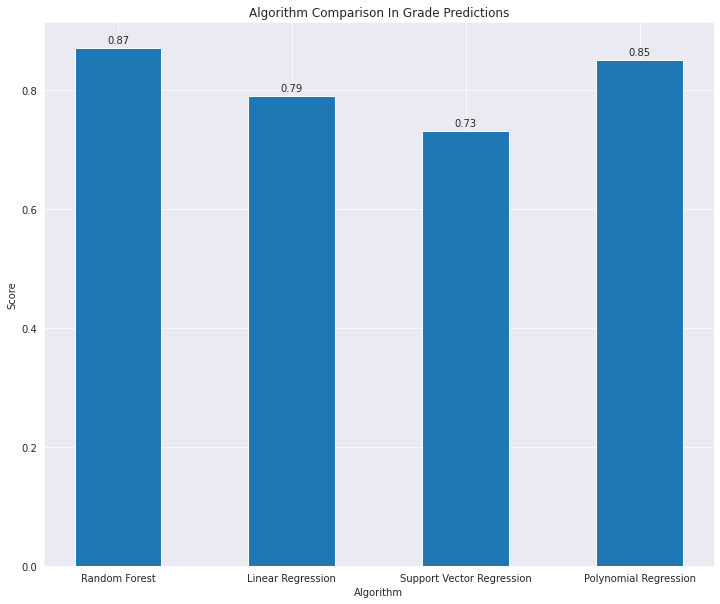

In [51]:
algorithm = list(df_model.Algorithm)
score = list(df_model.Score)

x = np.arange(len(algorithm))
width = 0.5

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(12)
ax.set_title("Algorithm Comparison In Grade Predictions")
ax.set_xlabel("Algorithm")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(algorithm)

algo_frame = ax.bar(x, score, width, label='Algorithm')
for algo in algo_frame:
    height = algo.get_height()
    ax.annotate("{}".format(height),
                xy = (algo.get_x() + algo.get_width() / 2, height),
                xytext = (0,3),
                textcoords="offset points",
                ha='center', va='bottom')
    
plt.show()

As we can see together, the best algorithm to predict grade score in this case is Random Forest with 0.87 in the predictions

Thanks and happy learning!!!

Have a Nice Code :)

[Kaggle Links](https://www.kaggle.com/cmglonly/ml-starter-in-grade-prediction)